# Matrix product state simulator example

## Import relevant modules

In [5]:
from basic_qc_simulator import Circuit
from basic_qc_simulator.simulators import MatrixProductStateSimulator

## Create a circuit

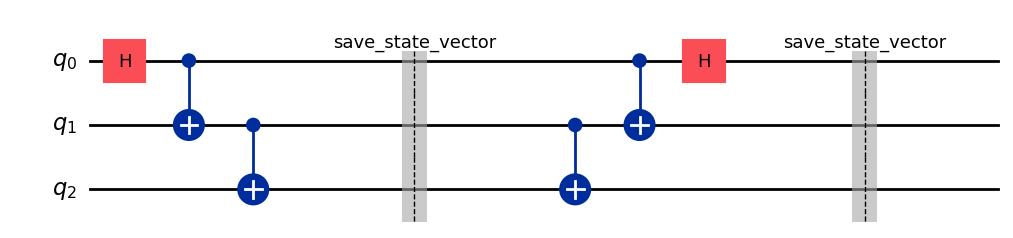

In [2]:
c = Circuit(3)
c.h(0)
c.cx(0, 1)
c.cx(1, 2)
c.save_result("state_vector")
c.cx(1, 2)
c.cx(0, 1)
c.h(0)
c.save_result("state_vector")
c.draw("mpl")

## Run the state vector simulator

In [3]:
sim = MatrixProductStateSimulator()
sim.run(c)

NotImplementedError: 

In [ ]:
sim.results[0].result

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [ ]:
sim.results[1].result

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [1]:
from basic_qc_simulator import Circuit
from basic_qc_simulator.simulators import MatrixProductStateSimulator
import numpy as np
import logging

logger = logging.getLogger("basic_qc_simulator")
logger.setLevel(logging.DEBUG)
if not logger.hasHandlers():
    logger.addHandler(logging.StreamHandler())

circ = Circuit(3)

circ.h(0)
circ.save_result("matrix_product_state")

sim = MatrixProductStateSimulator()
sv = np.array([1, 0, 0, 0, 0, 0, 0, 0], dtype=np.complex128)
# sv = np.array([1, 0, 0, 0, 0, 0, 0, 1], dtype=np.complex128) / np.sqrt(2)

# sim.run(circ)
# sim.results[0].resultsin

# sim._state_vector_to_left_canonical_matrix_product_state(sv, truncate=True)
sim._state_vector_to_vidal_matrix_product_state(sv, truncate=True)

Converting state vector to Vidal's matrix product state representation
Singular Value Decomposition: U=(2, 2), S=(2,), V_dagger=(4, 4)
Nonzero Singular Values: [1.]
Singular Value Decomposition: U=(2, 2), S=(2,), V_dagger=(2, 2)
Nonzero Singular Values: [1.]


([array([[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]]),
  array([[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]]),
  array([[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]])],
 [array([1.]), array([1.])])

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc = QuantumCircuit(3)

qc.save_matrix_product_state()
qsim = AerSimulator(method="matrix_product_state")
qsim.run(qc).result().data(0)["matrix_product_state"]

([(array([[1.+0.j]]), array([[0.+0.j]])),
  (array([[1.+0.j]]), array([[0.+0.j]])),
  (array([[1.+0.j]]), array([[0.+0.j]]))],
 [array([1.]), array([1.])])

In [6]:
obj_array = np.array([[["a", "b", "c", "d"], ["e", "f", "g", "h"]], [["i", "j", "k", "l"], ["m", "n", "o", "p"]]], dtype=object)

np.tensordot([[1, 2], [3, 4]], obj_array, axes=1)

array([[['aii', 'bjj', 'ckk', 'dll'],
        ['emm', 'fnn', 'goo', 'hpp']],

       [['aaaiiii', 'bbbjjjj', 'ccckkkk', 'dddllll'],
        ['eeemmmm', 'fffnnnn', 'gggoooo', 'hhhpppp']]], dtype=object)

In [2]:
from basic_qc_simulator.gates import GATETYPES_TO_GATE

def generate_random_circuit(num_qubits: int, depth: int, seed: int) -> Circuit:
    """
    Generate a random quantum circuit

    Args:
        num_qubits (int): number of qubits in the circuit
        depth (int): depth of the circuit

    Returns:
        Circuit: random quantum circuit
    """
    rng = np.random.default_rng(seed)
    circuit = Circuit(num_qubits)
    for _ in range(depth):
        # one-qubit gates
        for qubit in range(num_qubits):
            gate_type = rng.choice(
                ["i", "x", "y", "z", "h", "s", "t", "phase", "rx", "ry", "rz"]
            )
            if gate_type in ["phase", "rx", "ry", "rz"]:
                circuit.add_gate(
                    GATETYPES_TO_GATE[gate_type](rng.uniform(0, 2 * np.pi)),
                    [qubit],
                )
            else:
                circuit.add_gate(GATETYPES_TO_GATE[gate_type](), [qubit])
        # two-qubit gate
        gate = GATETYPES_TO_GATE[rng.choice(["cx", "ccx", "swap"])]()
        if num_qubits < gate.num_qubits:
            continue
        qubit = rng.integers(num_qubits - gate.num_qubits + 1)
        circuit.add_gate(gate, [qubit + i for i in range(gate.num_qubits)])
    return circuit


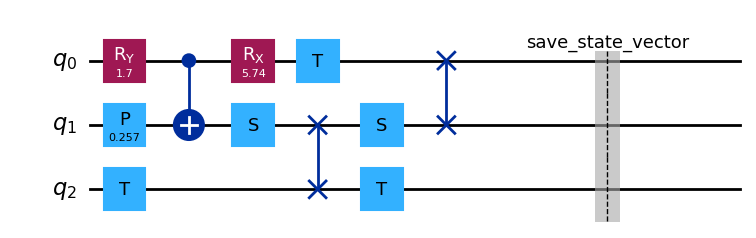

([array([[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]]),
  array([[-0.19139089-1.91390887e-01j, -0.96267287+0.00000000e+00j],
         [-0.96267287+1.79004889e-16j,  0.19139089-1.91390887e-01j]]),
  array([[-0.+0.j, -1.+0.j],
         [ 1.+0.j,  0.+0.j]])],
 [array([1.]), array([0.74966778, 0.66181434])])

In [27]:
from basic_qc_simulator import Circuit
from basic_qc_simulator.simulators import MatrixProductStateSimulator, StateVectorSimulator
import numpy as np
import logging

# logger = logging.getLogger("basic_qc_simulator")
# logger.setLevel(logging.DEBUG)
# if not logger.hasHandlers():
#     logger.addHandler(logging.StreamHandler())

circ = generate_random_circuit(3, 3, 0)

circ.save_result("state_vector")
display(circ.draw("mpl"))

sim = StateVectorSimulator()
sim.run(circ)
sv = sim.results[0].result

# MatrixProductStateSimulator._state_vector_to_left_canonical_matrix_product_state(sv, truncate=True)
MatrixProductStateSimulator._state_vector_to_vidal_matrix_product_state(sv, truncate=True)

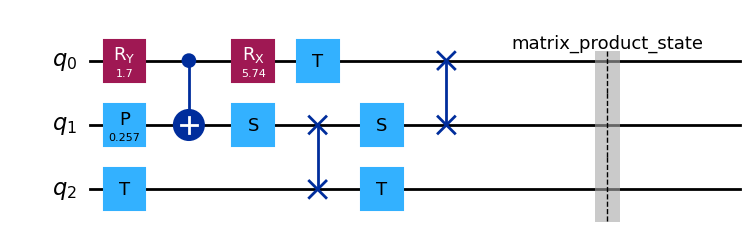

([(array([[1.+0.j]]), array([[0.+0.j]])),
  (array([[ 0.        +0.27066759j, -0.96267287-0.j        ]]),
   array([[0.68071252+0.68071252j, 0.19139089-0.19139089j]])),
  (array([[0.-0.j],
          [1.-0.j]]),
   array([[0.70710678-0.70710678j],
          [0.        +0.j        ]]))],
 [array([1.]), array([0.74966778, 0.66181434])])

In [28]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.passes import RemoveBarriers

qiskit_circ = circ.to_qiskit()
qiskit_circ = RemoveBarriers()(qiskit_circ)

qiskit_circ.save_matrix_product_state()
display(qiskit_circ.draw("mpl"))
qsim = AerSimulator(method="matrix_product_state")
qsim.run(qiskit_circ).result().data(0)["matrix_product_state"]